# Data Preprocessing and Cleaning

Data Source: [Data.gov](https://catalog.data.gov/dataset/nypd-calls-for-service) a non-federal dataset for public use. 
License: City of New York - NYC.gov see [Terms of Use](https://www.nyc.gov/home/terms-of-use.page)

Install required libraries using ****"pip install library_name"****, set environment variables and import the packages

In [1]:
import os #module used to provide a way of utilizing operating system dependent functionality like reading or setting environments 
import tempfile # module used for creating temporary storage locations 
os.environ["MPLCONFIGDIR"] = tempfile.gettempdir() # sets the MPLCONFIGDIR environment variable to the path returned by tempfile for Maatplotlib to store its config files

This can be particularly useful in scenarios where the user does not have the permission to write to the default Matplotlib configuration directory, or when you want to avoid cluttering the user's home directory with Matplotlib configuration files. It's also beneficial in a multi-user environment or in situations where you want to ensure that Matplotlib's configuration does not persist between program executions.

In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('ggplot') # Use to style data visualization
pd.set_option('display.max.columns', 200) # Set the data frame display option to show all columns up to 200 columns 

In [3]:
# Import and load the dataset using Padas to store as df
nypdData = '~/Datasets/RAW/NYPD_Calls_for_Service__Year_to_Date_.csv'
df = pd.read_csv(nypdData)

### Data Exploration 

#### 1. Dataset understanding

Check the shape of the data frame,
head and tail,
datatypes,
and statistical description

In [4]:
# Check how many rows and columns exist in the dataset
print ('Rows:', df.shape[0])
print ('Columns:', df.shape[1])

Rows: 7050127
Columns: 18


In [5]:
# Check the data frame in tabular form
df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,91250176,01/01/2023,12/31/2022,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,01/01/2023,12/31/2022,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221
2,91250681,01/01/2023,12/31/2022,23:55:56,114.0,QUEENS,PATROL BORO QUEENS NORTH,1008573,217117,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:26 AM,01/01/2023 12:06:18 AM,NaN,01/01/2023 12:06:27 AM,40.762587,-73.912199
3,91250683,01/01/2023,12/31/2022,23:55:59,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,993234,161780,11R4,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,01/01/2023 12:01:34 AM,01/01/2023 12:37:14 AM,01/01/2023 01:09:32 AM,01/01/2023 01:21:14 AM,40.610729,-73.967644
4,91250700,01/01/2023,12/31/2022,23:57:08,115.0,QUEENS,PATROL BORO QUEENS NORTH,1014264,211852,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:01:29 AM,01/01/2023 12:14:28 AM,01/01/2023 12:21:59 AM,01/01/2023 01:24:22 AM,40.748119,-73.891679


In [6]:
# Check the tail of the data frame
df.tail()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
7050122,99844053,12/31/2023,12/31/2023,23:59:06,10.0,MANHATTAN,PATROL BORO MAN SOUTH,986426,214907,30Q2,ROBBERY (IN PROGRESS): OTHER/OUTSIDE,Critical,12/31/2023 11:59:06 PM,01/01/2024 12:00:04 AM,01/01/2024 12:25:46 AM,01/01/2024 07:17:52 AM,40.756555,-73.992147
7050123,99844054,12/31/2023,12/31/2023,23:59:06,114.0,QUEENS,PATROL BORO QUEENS NORTH,1000362,215109,75D,VISIBILITY PATROL: DIRECTED,Non CIP,12/31/2023 11:59:06 PM,12/31/2023 11:59:06 PM,12/31/2023 11:59:06 PM,01/01/2024 05:16:22 AM,40.757095,-73.941844
7050124,99844058,12/31/2023,12/31/2023,23:59:21,94.0,BROOKLYN,PATROL BORO BKLYN NORTH,998365,200621,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,12/31/2023 11:59:21 PM,01/01/2024 12:24:28 AM,01/01/2024 02:16:36 AM,01/01/2024 02:18:06 AM,40.717332,-73.949083
7050125,99844059,12/31/2023,12/31/2023,23:59:29,13.0,MANHATTAN,PATROL BORO MAN SOUTH,987981,208816,50P9,DISORDERLY: PERSON/TRANSIT,Non CIP,12/31/2023 11:59:29 PM,01/01/2024 12:05:38 AM,01/01/2024 12:30:08 AM,01/01/2024 12:30:14 AM,40.739836,-73.986538
7050126,99844062,12/31/2023,12/31/2023,23:59:57,66.0,BROOKLYN,PATROL BORO BKLYN SOUTH,988601,173493,10Y3,INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER,Non CIP,12/31/2023 11:59:58 PM,01/01/2024 12:03:05 AM,NaN,01/01/2024 02:04:27 AM,40.642882,-73.984323


In [7]:
# Show basic statistics about the numeric series of the dataset, including counts, average, standard deviation etc. 
df.describe()

,CAD_EVNT_ID,NYPD_PCT_CD,GEO_CD_X,GEO_CD_Y,Latitude,Longitude
count,7.050127e+06,7.050123e+06,7.050127e+06,7.050127e+06,7.050127e+06,7.050127e+06
mean,9.551869e+07,6.063233e+01,1.003626e+06,2.074859e+05,4.073614e+01,-7.393006e+01
std,2.487523e+06,3.481665e+01,2.035810e+04,2.961937e+04,8.130092e-02,7.342417e-02
min,9.125018e+07,0.000000e+00,9.134110e+05,1.211310e+05,4.049891e+01,-7.425474e+01
25%,9.335395e+07,3.200000e+01,9.900280e+05,1.856010e+05,4.067605e+01,-7.397917e+01
50%,9.549693e+07,6.100000e+01,1.001732e+06,2.071380e+05,4.073523e+01,-7.393692e+01
75%,9.768264e+07,8.800000e+01,1.014683e+06,2.337910e+05,4.080837e+01,-7.389013e+01
max,9.984406e+07,1.230000e+02,1.067305e+06,2.723070e+05,4.091407e+01,-7.370029e+01


It seems that the numeric columns we have are geographical coordinates and called event index, while the other objects represented as numeric are datetime objects. Hence, we have to review the dataset, convert its datatypes to their correct format, and then drop columns that are not needed.

### Review Column Lists and Data Type(s): 
Inspect and ensure that each column is of the correct data type 

In [8]:
# Show a list of all the columns that we can later use to subset the data frame
df.columns

Index(['CAD_EVNT_ID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME',
       'NYPD_PCT_CD', 'BORO_NM', 'PATRL_BORO_NM', 'GEO_CD_X', 'GEO_CD_Y',
       'RADIO_CODE', 'TYP_DESC', 'CIP_JOBS', 'ADD_TS', 'DISP_TS', 'ARRIVD_TS',
       'CLOSNG_TS', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
# Converting all columns title to titleccase
df.columns = df.columns.str.title()

In [10]:
# Let's check the data types
df.dtypes

Cad_Evnt_Id        int64
Create_Date       object
Incident_Date     object
Incident_Time     object
Nypd_Pct_Cd      float64
Boro_Nm           object
Patrl_Boro_Nm     object
Geo_Cd_X           int64
Geo_Cd_Y           int64
Radio_Code        object
Typ_Desc          object
Cip_Jobs          object
Add_Ts            object
Disp_Ts           object
Arrivd_Ts         object
Closng_Ts         object
Latitude         float64
Longitude        float64
dtype: object

### Cast Data Type(s)
Cast the right data type to each column to ensure consistency and improve data quality and reliability. Ensure that each column is of the correct data type 

(e.g., convert object timestamps to datetime, integers, float, etc.). Check for and fill or remove NaN or null values to ensure data integrity.


In [11]:
# Convert create date, incident date, and incident time columns to datetime format, month, day, and year 
df['Create_Date'] = pd.to_datetime(df['Create_Date'], format='%m/%d/%Y')
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%m/%d/%Y')
df['Incident_Time'] = pd.to_datetime(df['Incident_Time'], format='%H:%M:%S').dt.time # use datetime accessor to keep only the time in 24 hrs format

In [12]:
df.head(2)

,Cad_Evnt_Id,Create_Date,Incident_Date,Incident_Time,Nypd_Pct_Cd,Boro_Nm,Patrl_Boro_Nm,Geo_Cd_X,Geo_Cd_Y,Radio_Code,Typ_Desc,Cip_Jobs,Add_Ts,Disp_Ts,Arrivd_Ts,Closng_Ts,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,01/01/2023 01:08:21 AM,01/01/2023 01:09:57 AM,NaN,01/01/2023 01:57:44 AM,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2023 12:38:00 AM,01/01/2023 12:38:34 AM,01/01/2023 12:44:33 AM,01/01/2023 01:45:21 AM,40.662817,-73.881221


In [13]:
# Convert the timestamp objects column to datetime 
# Note! There may be ambiguous date strings that may throw a dateutil warning. Ensure to use format parameters to overcome this. 
df['Add_Ts'] = pd.to_datetime(df['Add_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Disp_Ts'] = pd.to_datetime(df['Disp_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Arrivd_Ts'] = pd.to_datetime(df['Arrivd_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Closng_Ts'] = pd.to_datetime(df['Closng_Ts'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [14]:
# Convert the text objects column to string 
str_columns = ['Boro_Nm','Patrl_Boro_Nm','Typ_Desc','Cip_Jobs']
df[str_columns] = df[str_columns].astype(str)

In [15]:
# Verify columns datatypes conversion
df.dtypes

Cad_Evnt_Id               int64
Create_Date      datetime64[ns]
Incident_Date    datetime64[ns]
Incident_Time            object
Nypd_Pct_Cd             float64
Boro_Nm                  object
Patrl_Boro_Nm            object
Geo_Cd_X                  int64
Geo_Cd_Y                  int64
Radio_Code               object
Typ_Desc                 object
Cip_Jobs                 object
Add_Ts           datetime64[ns]
Disp_Ts          datetime64[ns]
Arrivd_Ts        datetime64[ns]
Closng_Ts        datetime64[ns]
Latitude                float64
Longitude               float64
dtype: object

### Handle Missing Values and Validate Data:
Now that we've cast datatypes to their correct format. Let's identify missing values we noticed and decide on a strategy for handling them (e.g., imputation or removal) and validate geo spatial data.

In [16]:
# Check for the number of NaN or null values in each column
df.isna().sum()

Cad_Evnt_Id            0
Create_Date            0
Incident_Date          0
Incident_Time          0
Nypd_Pct_Cd            4
Boro_Nm                0
Patrl_Boro_Nm          0
Geo_Cd_X               0
Geo_Cd_Y               0
Radio_Code             0
Typ_Desc               0
Cip_Jobs               0
Add_Ts                 0
Disp_Ts                0
Arrivd_Ts        1503133
Closng_Ts             20
Latitude               0
Longitude              0
dtype: int64

In [17]:
# Check for duplicate values
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
7050122    False
7050123    False
7050124    False
7050125    False
7050126    False
Length: 7050127, dtype: bool

In [18]:
# Checking the percentage of missing values to determine missing values handling strategy i.e. if we should drop it, fill or not
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

Arrivd_Ts        21.320651
Closng_Ts         0.000284
Nypd_Pct_Cd       0.000057
Cad_Evnt_Id       0.000000
Typ_Desc          0.000000
Latitude          0.000000
Disp_Ts           0.000000
Add_Ts            0.000000
Cip_Jobs          0.000000
Radio_Code        0.000000
Create_Date       0.000000
Geo_Cd_Y          0.000000
Geo_Cd_X          0.000000
Patrl_Boro_Nm     0.000000
Boro_Nm           0.000000
Incident_Time     0.000000
Incident_Date     0.000000
Longitude         0.000000
dtype: float64

We can see the (3) columns contain null values, namely "Arrivd_Ts" with 21% missing values, "Closng_Ts" and Nypd_Pct_Cd with less than 1%. Hence, if we drop these, we will have about 78% total sample size for our analysis. As a rule of thumb, you need about 80% - 90% volume of the data for a reliable data analysis. For this reason I will use imputation to fill, in the missing time columns with neam match timestamps to retain other important values.  

In [19]:
# Perform forward and backward fill to preserve the temporal order of observations, making them suitable for time series with consistent intervals.
df['Arrivd_Ts'].ffill(inplace=True)
df['Arrivd_Ts'].bfill(inplace=True)
df['Closng_Ts'].ffill(inplace=True)
df['Closng_Ts'].bfill(inplace=True)
df['Nypd_Pct_Cd'].ffill(inplace=True)
df['Nypd_Pct_Cd'].bfill(inplace=True)

Validate geospatial data to ensure these values are within valid ranges (Latitude between -90 and 90, Longitude between -180 and 180). 

In [20]:
# Validate Latitude and Longitude
df = df[(df['Latitude'].between(-90, 90)) & (df['Longitude'].between(-180, 180))]

### Restructure Data frame

In [21]:
df.head(2)

,Cad_Evnt_Id,Create_Date,Incident_Date,Incident_Time,Nypd_Pct_Cd,Boro_Nm,Patrl_Boro_Nm,Geo_Cd_X,Geo_Cd_Y,Radio_Code,Typ_Desc,Cip_Jobs,Add_Ts,Disp_Ts,Arrivd_Ts,Closng_Ts,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31,23:24:39,67.0,BROOKLYN,PATROL BORO BKLYN SOUTH,1001878,175994,53I,VEHICLE ACCIDENT: INJURY,Non CIP,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31,23:24:47,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017204,180778,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,40.662817,-73.881221


Now that we've filled a cell with missing or NaN values let's restructure the data frame and create a subset for the data frame we will use for analysis. Notice that not all column names are meaningful at a glance, and the incident type and description column (typ_desc) is in uppercase. Hence, let's remane the columns with legible names and change the type and description to title case to enhance readability.

In [22]:
# Creating data frame subset, renaming selected columns titles, and dropping unwanted columns (Nypd_Pct_Cd) NYPD Pricent Code and Radio_Code
df_subset = df.rename(columns={'Cad_Evnt_Id':'Event_Id', 'Boro_Nm':'Borough', 'Patrl_Boro_Nm':'Neighborhood', 'Geo_Cd_X':'Block_X_Coordinate', 'Geo_Cd_Y':'Block_Y_Coordinate',
                                'Typ_Desc':'Type_Description', 'Cip_Jobs':'Call_Flag','Add_Ts':'Time_Call_Added', 'Arrivd_Ts':'Time_Arrived','Disp_Ts':'Dispatch_Time', 
                                'Closng_Ts':'Closing_Time'}).copy()

In [23]:
# Dropping unwanted columns
df_subset = df_subset.drop(columns=['Nypd_Pct_Cd','Radio_Code'])

In [24]:
# Reset dataframe index
df_subset = df_subset.reset_index(drop=True)

In [25]:
df_subset.columns

Index(['Event_Id', 'Create_Date', 'Incident_Date', 'Incident_Time', 'Borough',
       'Neighborhood', 'Block_X_Coordinate', 'Block_Y_Coordinate',
       'Type_Description', 'Call_Flag', 'Time_Call_Added', 'Dispatch_Time',
       'Time_Arrived', 'Closing_Time', 'Latitude', 'Longitude'],
      dtype='object')

In [26]:
# Get rid of columns not required and rearrange dataframe into a new dataset
df_subset = df_subset[['Event_Id', 'Create_Date', 'Incident_Date', 'Incident_Time', 'Type_Description', 'Call_Flag', 'Borough', 'Neighborhood', 
         'Time_Call_Added', 'Dispatch_Time', 'Time_Arrived', 'Closing_Time', 'Block_X_Coordinate', 'Block_Y_Coordinate', 'Latitude', 'Longitude']]       

In [27]:
df_subset.head()

,Event_Id,Create_Date,Incident_Date,Incident_Time,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31,23:24:39,VEHICLE ACCIDENT: INJURY,Non CIP,BROOKLYN,PATROL BORO BKLYN SOUTH,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31,23:24:47,ALARMS: COMMERCIAL/BURGLARY,Non CIP,BROOKLYN,PATROL BORO BKLYN NORTH,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221
2,91250681,2023-01-01,2022-12-31,23:55:56,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,QUEENS,PATROL BORO QUEENS NORTH,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:06:27,1008573,217117,40.762587,-73.912199
3,91250683,2023-01-01,2022-12-31,23:55:59,ALARMS: RESIDENTIAL/BURGLARY,Non CIP,BROOKLYN,PATROL BORO BKLYN SOUTH,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,993234,161780,40.610729,-73.967644
4,91250700,2023-01-01,2022-12-31,23:57:08,ALARMS: COMMERCIAL/BURGLARY,Non CIP,QUEENS,PATROL BORO QUEENS NORTH,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,1014264,211852,40.748119,-73.891679


In [28]:
# Changing column contents string to title case to selected columns using a for loop
col_titlecase = ['Type_Description','Borough','Neighborhood',]
for i in col_titlecase:
    if i in df_subset.columns:
        df_subset[i] = df_subset[i].astype(str).str.title() # Check if the column exists to avoid errors

In [29]:
# Preview changes
df_subset.head()

,Event_Id,Create_Date,Incident_Date,Incident_Time,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31,23:24:39,Vehicle Accident: Injury,Non CIP,Brooklyn,Patrol Boro Bklyn South,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31,23:24:47,Alarms: Commercial/Burglary,Non CIP,Brooklyn,Patrol Boro Bklyn North,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221
2,91250681,2023-01-01,2022-12-31,23:55:56,Alarms: Residential/Burglary,Non CIP,Queens,Patrol Boro Queens North,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:06:27,1008573,217117,40.762587,-73.912199
3,91250683,2023-01-01,2022-12-31,23:55:59,Alarms: Residential/Burglary,Non CIP,Brooklyn,Patrol Boro Bklyn South,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,993234,161780,40.610729,-73.967644
4,91250700,2023-01-01,2022-12-31,23:57:08,Alarms: Commercial/Burglary,Non CIP,Queens,Patrol Boro Queens North,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,1014264,211852,40.748119,-73.891679


We can see that the Neighborhood column contains data related to the area patrolled, named **The Boroughs of New York**, which comprise five major governmental districts including ***The Bronx, Brooklyn, Manhattan, Queens, and Staten Island***. Therefore, let's split these neighborhoods and assign them a new column to reflect areas where calls were made. Learn more about [The Boroughs of New York](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City).

In [30]:
# Preview dataframe 
df_subset['Neighborhood'].value_counts(dropna=False)

Neighborhood
Patrol Boro Bronx            1372403
Patrol Boro Bklyn North      1060348
Patrol Boro Bklyn South      1042241
Patrol Boro Man South        1029134
Patrol Boro Man North         984443
Patrol Boro Queens North      695478
Patrol Boro Queens South      603501
Patrol Boro Staten Island     262426
(Null)                           153
Name: count, dtype: int64

In [31]:
# Filter out (Null) string values
df_subset = df_subset[df_subset['Neighborhood'] != '(Null)']

In [32]:
# Extract everything after "Patrol Boro" and assign it to a new column 'neighborhood.' 
df_subset['Neighborhood'] = df_subset['Neighborhood'].str.extract('Patrol Boro (.*)')

In [33]:
# Preview dataframe 
df_subset['Neighborhood'].value_counts(dropna=False)

Neighborhood
Bronx            1372403
Bklyn North      1060348
Bklyn South      1042241
Man South        1029134
Man North         984443
Queens North      695478
Queens South      603501
Staten Island     262426
Name: count, dtype: int64

In [34]:
# Replace neighborhoods abbreviations with their full name for clarity
df_subset['Neighborhood'] = df_subset['Neighborhood'].str.replace('Bklyn', 'Brooklyn').str.replace('Man', 'Manhattan')

In [35]:
# Preview dataframe 
df_subset['Neighborhood'].value_counts(dropna=False)

Neighborhood
Bronx              1372403
Brooklyn North     1060348
Brooklyn South     1042241
Manhattan South    1029134
Manhattan North     984443
Queens North        695478
Queens South        603501
Staten Island       262426
Name: count, dtype: int64

In [36]:
# Preview the dataset for null values
df_subset.isnull().sum()

Event_Id              0
Create_Date           0
Incident_Date         0
Incident_Time         0
Type_Description      0
Call_Flag             0
Borough               0
Neighborhood          0
Time_Call_Added       0
Dispatch_Time         0
Time_Arrived          0
Closing_Time          0
Block_X_Coordinate    0
Block_Y_Coordinate    0
Latitude              0
Longitude             0
dtype: int64

In [37]:
df_subset.dtypes

Event_Id                       int64
Create_Date           datetime64[ns]
Incident_Date         datetime64[ns]
Incident_Time                 object
Type_Description              object
Call_Flag                     object
Borough                       object
Neighborhood                  object
Time_Call_Added       datetime64[ns]
Dispatch_Time         datetime64[ns]
Time_Arrived          datetime64[ns]
Closing_Time          datetime64[ns]
Block_X_Coordinate             int64
Block_Y_Coordinate             int64
Latitude                     float64
Longitude                    float64
dtype: object

At this point, the data is cleaned, transformed, restructured, and standardized for analysis with subsets created. Let's perform basic univariate EDA to understand the data's granularity, identify unique values in fields such as incident types and locations, and gain insights into the frequency of 911 calls and from the neighborhood with the most incident calls. Also, validate geospatial data to ensure these values are within valid ranges (Latitude between -90 and 90, Longitude between -180 and 180). Finally, checking for outliers or incorrect values that could indicate data entry errors before exporting data for Temporal Analysis, Geographical Distribution, Correlation and Pattern Identification and Visualization.

To begin, let's create a subset of the data frame 

In [38]:
# Create another subset
df_subset1 = df_subset
df_subset1.head()

,Event_Id,Create_Date,Incident_Date,Incident_Time,Type_Description,Call_Flag,Borough,Neighborhood,Time_Call_Added,Dispatch_Time,Time_Arrived,Closing_Time,Block_X_Coordinate,Block_Y_Coordinate,Latitude,Longitude
0,91250176,2023-01-01,2022-12-31,23:24:39,Vehicle Accident: Injury,Non CIP,Brooklyn,Brooklyn South,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 00:44:33,2023-01-01 01:57:44,1001878,175994,40.649730,-73.936475
1,91250180,2023-01-01,2022-12-31,23:24:47,Alarms: Commercial/Burglary,Non CIP,Brooklyn,Brooklyn North,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,1017204,180778,40.662817,-73.881221
2,91250681,2023-01-01,2022-12-31,23:55:56,Alarms: Residential/Burglary,Non CIP,Queens,Queens North,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:44:33,2023-01-01 00:06:27,1008573,217117,40.762587,-73.912199
3,91250683,2023-01-01,2022-12-31,23:55:59,Alarms: Residential/Burglary,Non CIP,Brooklyn,Brooklyn South,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,993234,161780,40.610729,-73.967644
4,91250700,2023-01-01,2022-12-31,23:57:08,Alarms: Commercial/Burglary,Non CIP,Queens,Queens North,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,1014264,211852,40.748119,-73.891679


Text(0, 0.5, 'Frequency of calls (in millions)')

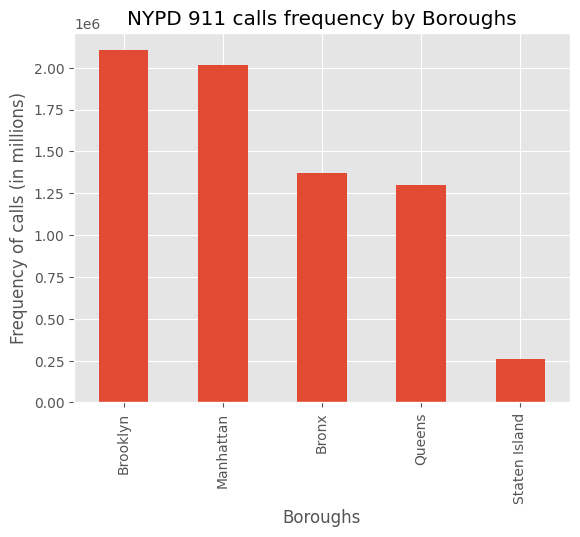

In [39]:
## Fequency of emergency calls
df_subset1['Borough'].value_counts().plot(kind='bar')
plt.title('NYPD 911 calls frequency by Boroughs')
plt.xlabel('Boroughs')
plt.ylabel('Frequency of calls (in millions)')


Text(0, 0.5, 'Frequency of calls (in millions)')

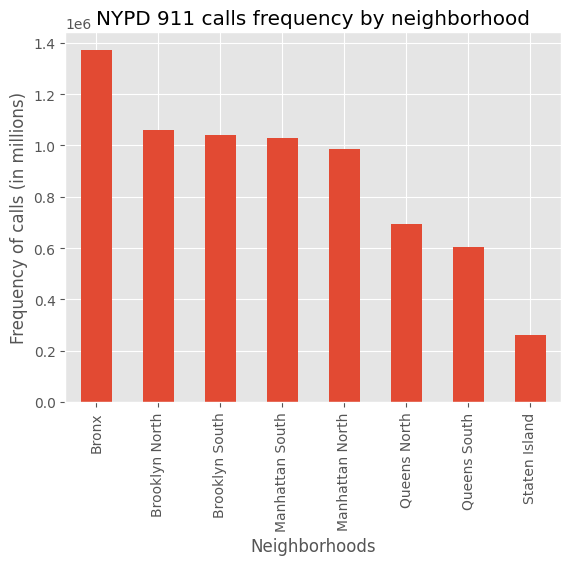

In [40]:
## Fequency of emergency calls

df_subset1['Neighborhood'].value_counts().plot(kind='bar')
plt.title('NYPD 911 calls frequency by neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Frequency of calls (in millions)')


Text(0, 0.5, 'Incident Type(s)')

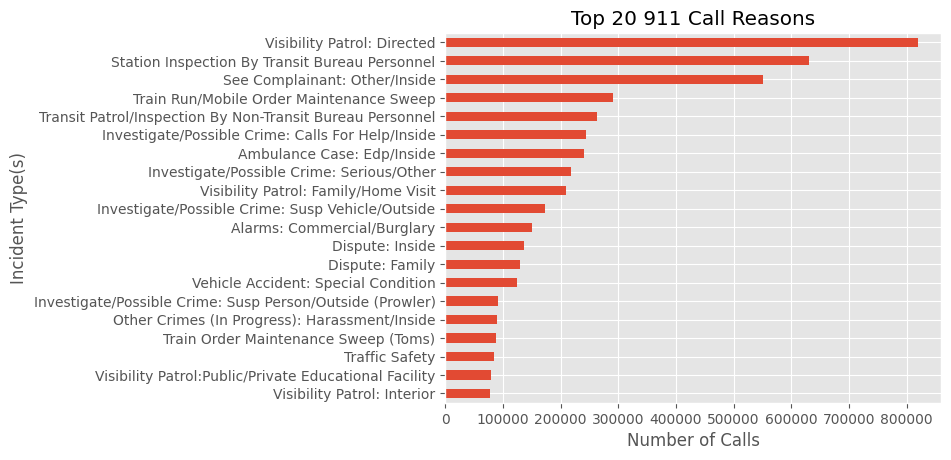

In [41]:
## Fequency of 911 calls by type between in 2023
plt.figure()
df_subset1['Type_Description'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 20 911 Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Incident Type(s)')


Text(0, 0.5, 'Incident Type(s)')

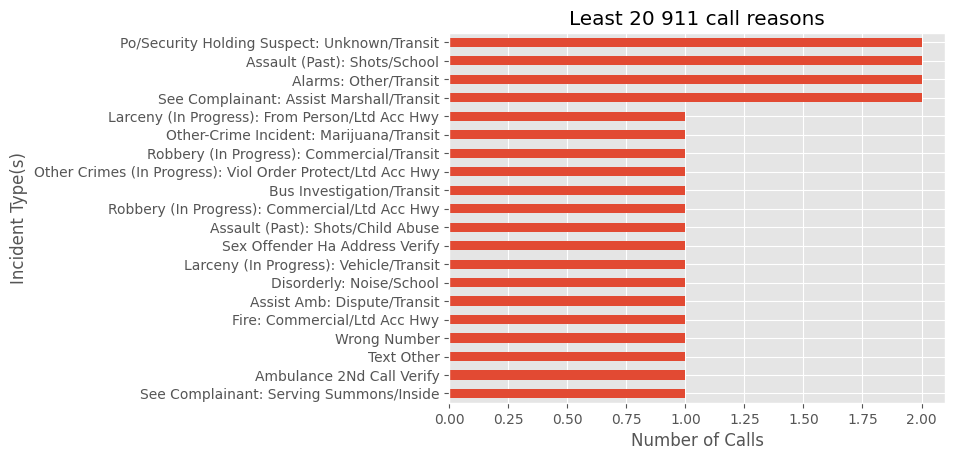

In [42]:
## Fequency of 911 calls by type between in 2023
plt.figure()
df_subset1['Type_Description'].value_counts().tail(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Least 20 911 call reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Incident Type(s)')


In [45]:
# Export the cleaned data frame to a pickle file to serialize, save space, and retain datatypes
df_subset1.to_pickle('~/Datasets/CLEANED/nypd_911calls_clean.pkl')
# `index=False` means the DataFrame's index will not be written to the file.
# Optionally to include in export, set `index=True`.